In [1]:
import pandas as pd
import json
import numpy as np
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import seaborn as sns

## Results

In [2]:
graph_types = ["total", "export", "export-layered", "multi-graph-export", "multi-graph-total"]
metrics = ["Accuracy", "F1 - Avg. Macro", "F1 - Positives"]
models = ["RND", "MLP", "GCN", "GAT", "SAGE", "ENSEMBLE"]
models_results = {g: {m: {n: [] for n in metrics} for m in models} for g in graph_types}

palette = {
    "RND": "gray",
    "MLP": '#96a6a6',#"slategray",
    "GCN": '#1976d2',#"maroon",
    "GATv2": '#ef6c00',#"darkolivegreen",
    "SAGE": '#ffd54f',#"darkmagenta",
    "ENSEMBLE":'#00bfa5'#"midnightblue"
}

Read results

In [3]:
df = {
    "g": [],
    "m": [],
    "n": [],
    "s": [],
    "v": []
    }

for graph_type in graph_types: # Graph types
    for model in models: # Models
        for seed in range(1, 11): # Seeds

            if model == "RND": # Random model has same results for graph types
                if graph_type.startswith("multi-"):
                    filepath = f"./results/{model}/{model}-m-{seed}-report.json"
                else:
                    filepath = f"./results/{model}/{model}-{seed}-report.json"
            else:
                filepath = f"./results/{model}/{graph_type}/{model}-{graph_type}-{seed}-report.json"

            if (graph_type == "export-layered") and (model in ["RND"]):
                pass
            else:
                with open(filepath, "r") as f:
                    results = json.load(f)

            # Accuracy
            for metric in metrics:
                df["g"].append(graph_type)
                df["m"].append(model)
                df["n"].append(metric)
                df["s"].append(seed)
                if (graph_type == "export-layered") and (model in ["RND"]):
                    df["v"].append(np.nan) # RND and MLP not trained on export-layered graph
                else:
                    df["v"].append(results[metric])

In [4]:
df = pd.DataFrame(df)
df.columns = ["Graph", "Model", "Metric", "Seed", "Value"]
df.Graph = df.Graph.str.capitalize()
df.Model = df.Model.replace("GAT", "GATv2")
df.Graph = df.Graph.replace("Export-layered", "Export + Layer")
df.Graph = df.Graph.replace("Multi-graph-export", "Multi-Graph Export")
df.Graph = df.Graph.replace("Multi-graph-total", "Multi-Graph Total")

In [5]:
df.head()

,Graph,Model,Metric,Seed,Value
0,Total,RND,Accuracy,1,0.453197
1,Total,RND,F1 - Avg. Macro,1,0.337660
2,Total,RND,F1 - Positives,1,0.061028
3,Total,RND,Accuracy,2,0.497785
4,Total,RND,F1 - Avg. Macro,2,0.360544


In [6]:
df.loc[(df.Model=="RND") & (df.Graph=="Multi-Graph Total") & (df.Metric == "F1 - Positives")]

,Graph,Model,Metric,Seed,Value
722,Multi-Graph Total,RND,F1 - Positives,1,0.670927
725,Multi-Graph Total,RND,F1 - Positives,2,0.561056
728,Multi-Graph Total,RND,F1 - Positives,3,0.559727
731,Multi-Graph Total,RND,F1 - Positives,4,0.631922
734,Multi-Graph Total,RND,F1 - Positives,5,0.608108
737,Multi-Graph Total,RND,F1 - Positives,6,0.596026
740,Multi-Graph Total,RND,F1 - Positives,7,0.590604
743,Multi-Graph Total,RND,F1 - Positives,8,0.603279
746,Multi-Graph Total,RND,F1 - Positives,9,0.596026
749,Multi-Graph Total,RND,F1 - Positives,10,0.623377


In [7]:
df.loc[(df.Model=="RND")]

,Graph,Model,Metric,Seed,Value
0,Total,RND,Accuracy,1,0.453197
1,Total,RND,F1 - Avg. Macro,1,0.337660
2,Total,RND,F1 - Positives,1,0.061028
3,Total,RND,Accuracy,2,0.497785
4,Total,RND,F1 - Avg. Macro,2,0.360544
...,...,...,...,...,...
745,Multi-Graph Total,RND,F1 - Avg. Macro,9,0.434918
746,Multi-Graph Total,RND,F1 - Positives,9,0.596026
747,Multi-Graph Total,RND,Accuracy,10,0.506383
748,Multi-Graph Total,RND,F1 - Avg. Macro,10,0.453664


''

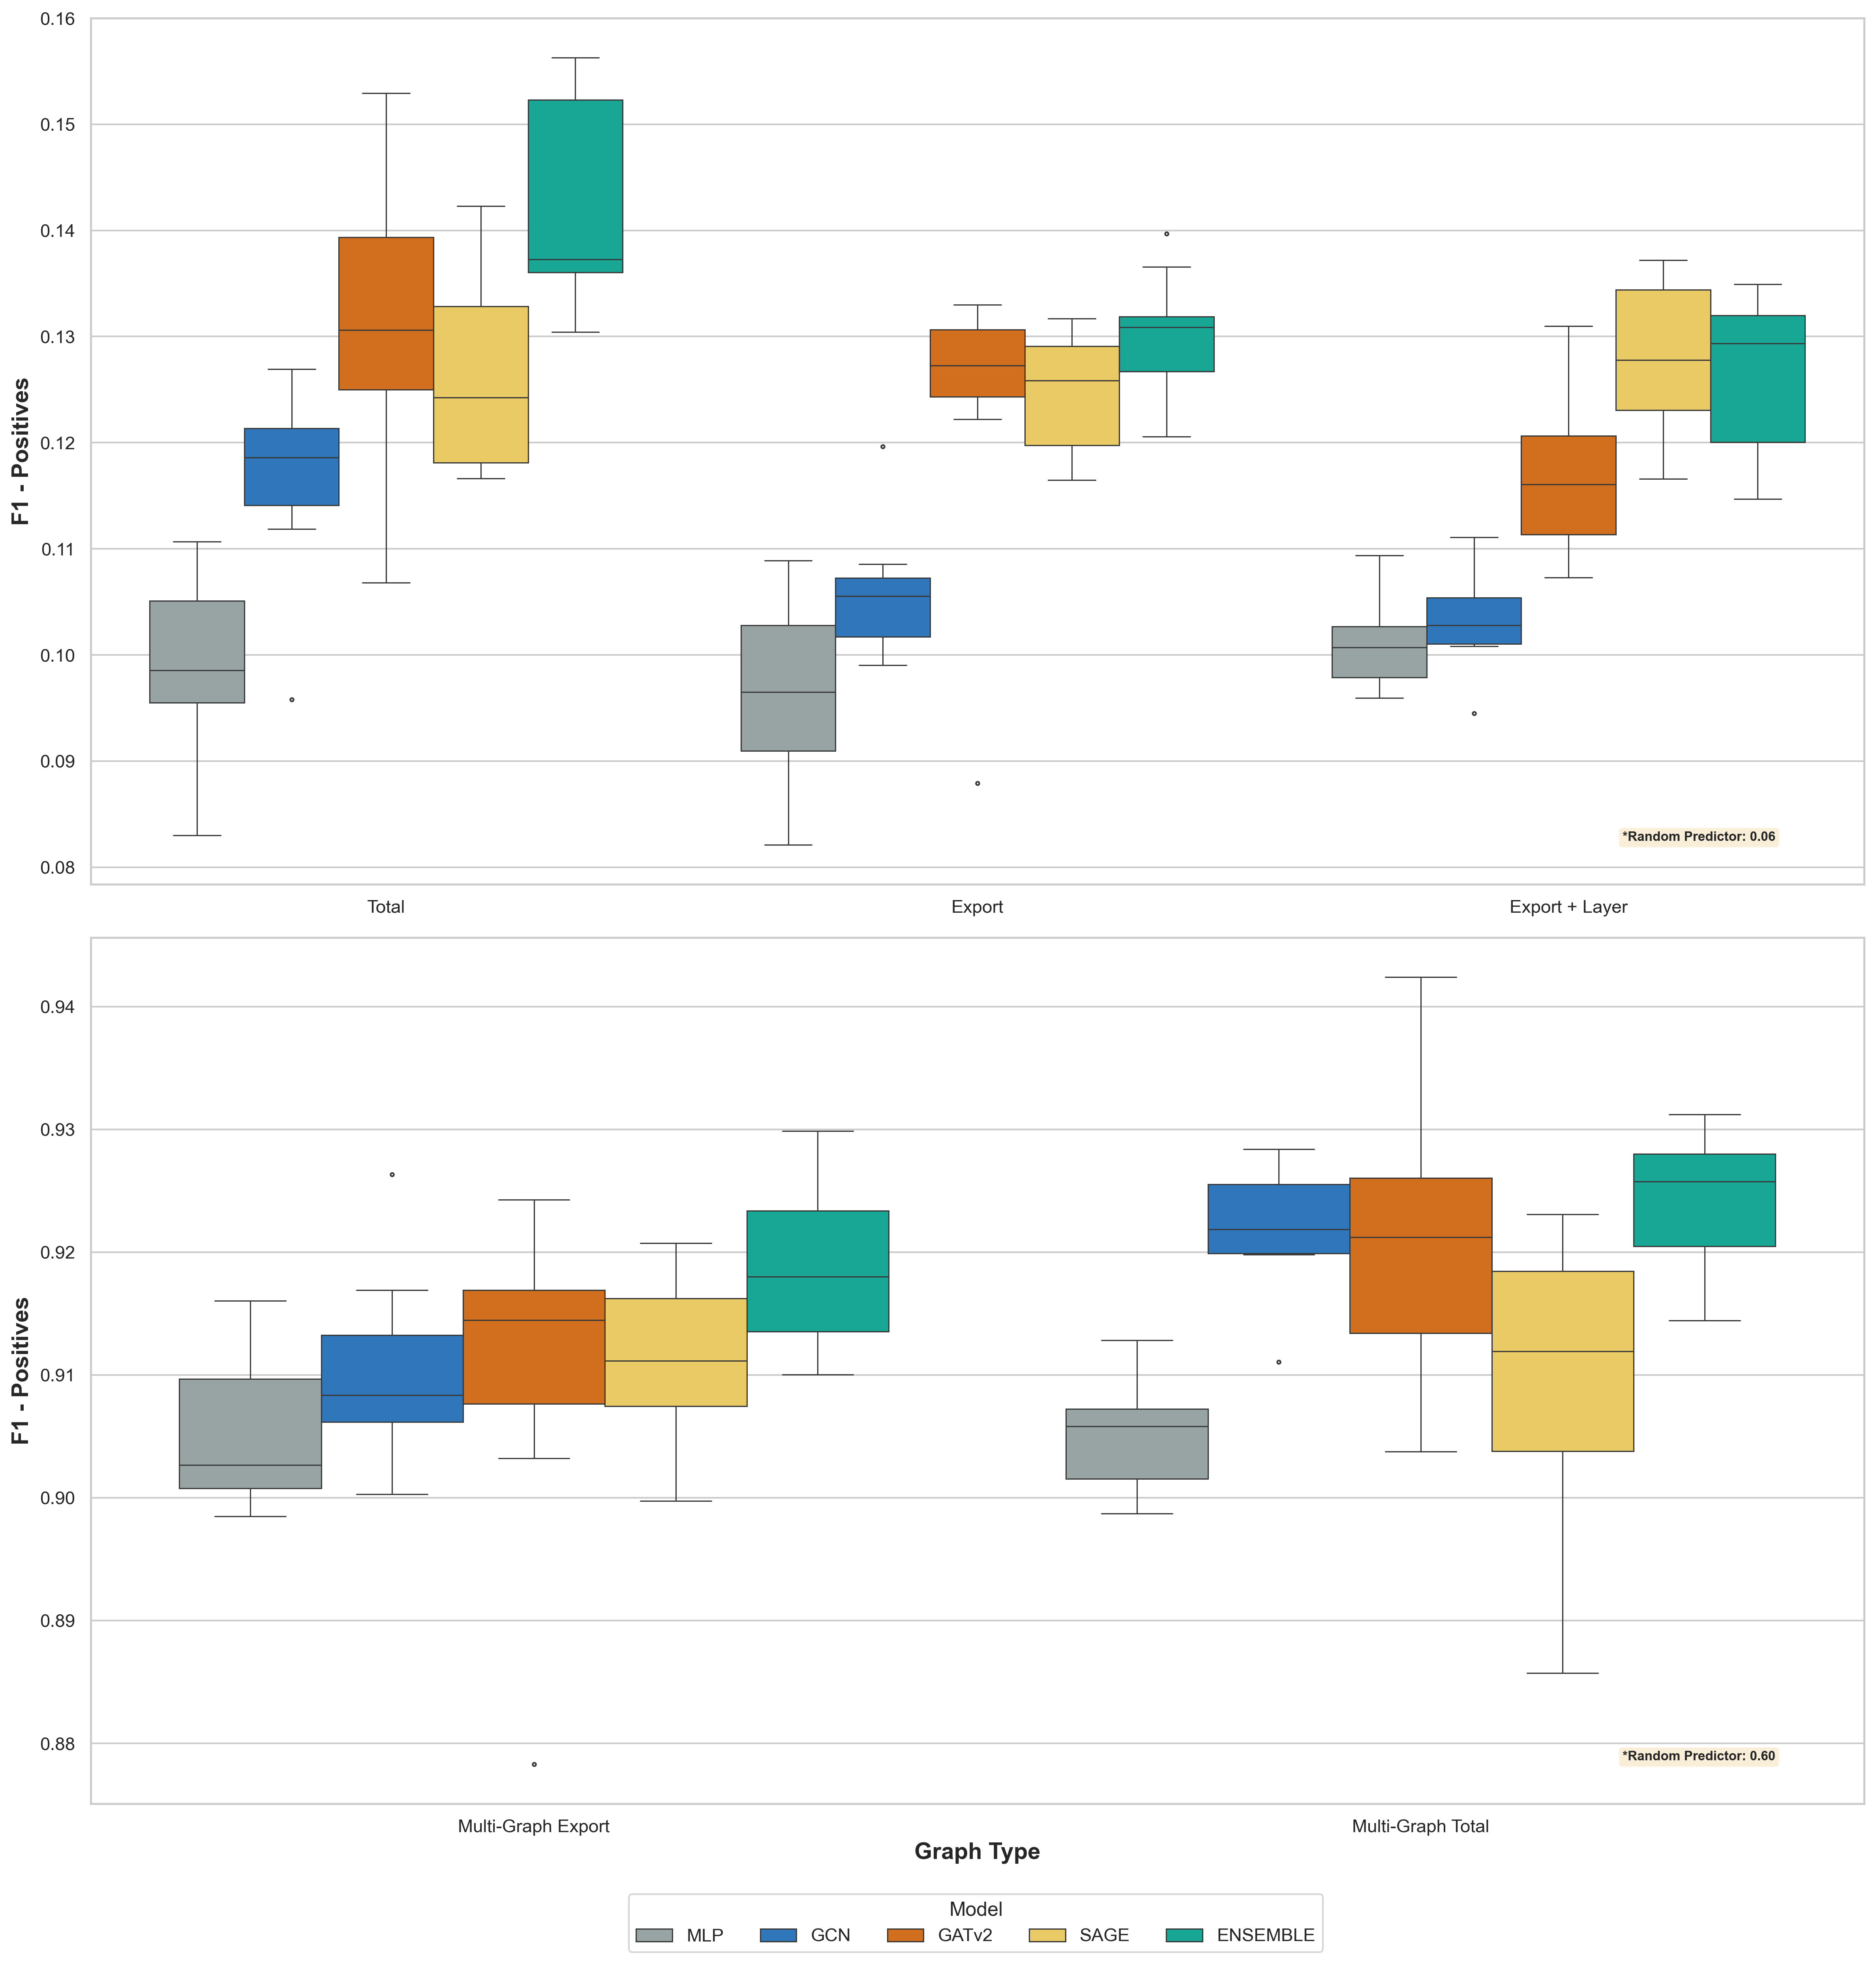

In [8]:
sns.set_style("whitegrid")
sns.set_context("notebook")

fig, ax = plt.subplots(2, 1, figsize=(16, 16), dpi=300)

subset1 = df[~df.Graph.str.startswith("Multi")]
subset2 = df[df.Graph.str.startswith("Multi")]
metric1 = "F1 - Positives"
metric2 = "F1 - Positives"#"Accuracy"


sns.boxplot(data=subset1[(subset1.Metric==metric1) & (subset1.Model!="RND")], x="Graph", y="Value", hue="Model", palette=palette, ax=ax[0],\
             showfliers=True, linewidth=.75, fliersize=2, saturation=0.75)
ax[0].set_xlabel("Graph Type", fontsize=14, fontweight="bold")
ax[0].set_ylabel(metric1, fontsize=14, fontweight="bold")
ax[0].set_xlabel("")
ax[0].get_legend().remove()
ax[0].text(0.95, 0.05, f'*Random Predictor: {df.loc[(df.Model=="RND") & (df.Graph=="Total") & (df.Metric == metric1)]["Value"].mean():.2f}', \
           transform=ax[0].transAxes, fontsize=8, fontweight="bold", horizontalalignment="right", bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
#ax.text(0.9, 0.9, 'Top Right', transform=ax.transAxes,
#        fontsize=12, verticalalignment='top', horizontalalignment='right')
sns.boxplot(data=subset2[(subset2.Metric==metric2) & (subset2.Model!="RND")], x="Graph", y="Value", hue="Model", palette=palette, ax=ax[1],\
             showfliers=True, linewidth=.75, fliersize=2, saturation=0.75)

ax[1].set_xlabel("Graph Type", fontsize=14, fontweight="bold")
ax[1].set_ylabel(metric2, fontsize=14, fontweight="bold")
ax[1].get_legend().remove()
ax[1].text(0.95, 0.05, f'*Random Predictor: {df.loc[(df.Model=="RND") & (df.Graph=="Multi-Graph Total") & (df.Metric == metric2)]["Value"].mean():.2f}', \
           transform=ax[1].transAxes, fontsize=8, fontweight="bold", horizontalalignment="right", bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Remove duplicate legends and create a single legend at the bottom
handles, labels = ax[0].get_legend_handles_labels()
plt.tight_layout()
fig.legend(handles, labels, title="Model", loc='lower center', ncol=5, bbox_to_anchor=(0.52, -0.04))
plt.savefig("results-boxplots.pdf", bbox_inches="tight")
;

In [9]:
models[3] = "GATv2"

In [10]:
metric = "F1 - Positives"
for graph in df.Graph.unique():
    print(graph)
    for m1 in range(len(models)-1):
        model1 = df.loc[(df.Model == models[m1]) & (df.Metric == metric) & (df.Graph == graph), "Value"]
        print(f"{models[m1]}: {np.mean(model1)} ({np.std(model1)})")
        for m2 in range(m1+1, len(models)):
            model2 = df.loc[(df.Model == models[m2]) & (df.Metric == metric) & (df.Graph == graph), "Value"]
            
            t, p = ttest_rel(model1, model2)
            print(f"Difference {models[m1]} vs {models[m2]}: {np.mean(model1) - np.mean(model2):.4f} | P-Value {p:.4f}")
    model1 = df.loc[(df.Model == models[-1]) & (df.Metric == metric) & (df.Graph == graph), "Value"]
    print(f"{models[-1]}: {np.mean(model1)} ({np.std(model1)})")
    print()

Total
RND: 0.06332677334869971 (0.0029494249637050376)
Difference RND vs MLP: -0.0349 | P-Value 0.0000
Difference RND vs GCN: -0.0534 | P-Value 0.0000
Difference RND vs GATv2: -0.0674 | P-Value 0.0000
Difference RND vs SAGE: -0.0630 | P-Value 0.0000
Difference RND vs ENSEMBLE: -0.0790 | P-Value 0.0000
MLP: 0.09819964684658924 (0.00855109369880118)
Difference MLP vs GCN: -0.0186 | P-Value 0.0021
Difference MLP vs GATv2: -0.0325 | P-Value 0.0000
Difference MLP vs SAGE: -0.0282 | P-Value 0.0000
Difference MLP vs ENSEMBLE: -0.0441 | P-Value 0.0000
GCN: 0.11675335635524617 (0.00820230316719414)
Difference GCN vs GATv2: -0.0140 | P-Value 0.0202
Difference GCN vs SAGE: -0.0096 | P-Value 0.0563
Difference GCN vs ENSEMBLE: -0.0256 | P-Value 0.0000
GATv2: 0.1307293063731693 (0.012735496094412643)
Difference GATv2 vs SAGE: 0.0044 | P-Value 0.3515
Difference GATv2 vs ENSEMBLE: -0.0116 | P-Value 0.0032
SAGE: 0.12636150373145555 (0.008598341922782445)
Difference SAGE vs ENSEMBLE: -0.0159 | P-Value 0

In [11]:
over_baseline = {"Graph": [], "Model": [], "Over Baseline": []}

for graph in df.Graph.unique():

    if "Multi" in graph:
        baseline = df.loc[(df.Model == "RND") & (df.Graph.str.startswith("Multi")) & (df.Metric == "F1 - Positives"), "Value"].mean() # Random baseline is always the same
    else:
        baseline = df.loc[(df.Model == "RND") & (~df.Graph.str.startswith("Multi")) & (df.Metric == "F1 - Positives"), "Value"].mean() # Random baseline is always the same
    
    for model in df.Model.unique():
        if model == "RND":
            continue
        over_baseline["Graph"].append(graph)
        over_baseline["Model"].append(model)
        over_baseline["Over Baseline"].append(df.loc[(df.Model == model) & (df.Graph == graph) & (df.Metric == "F1 - Positives"), "Value"].mean() / \
           baseline - 1)

In [12]:
over_baseline = pd.DataFrame(over_baseline)

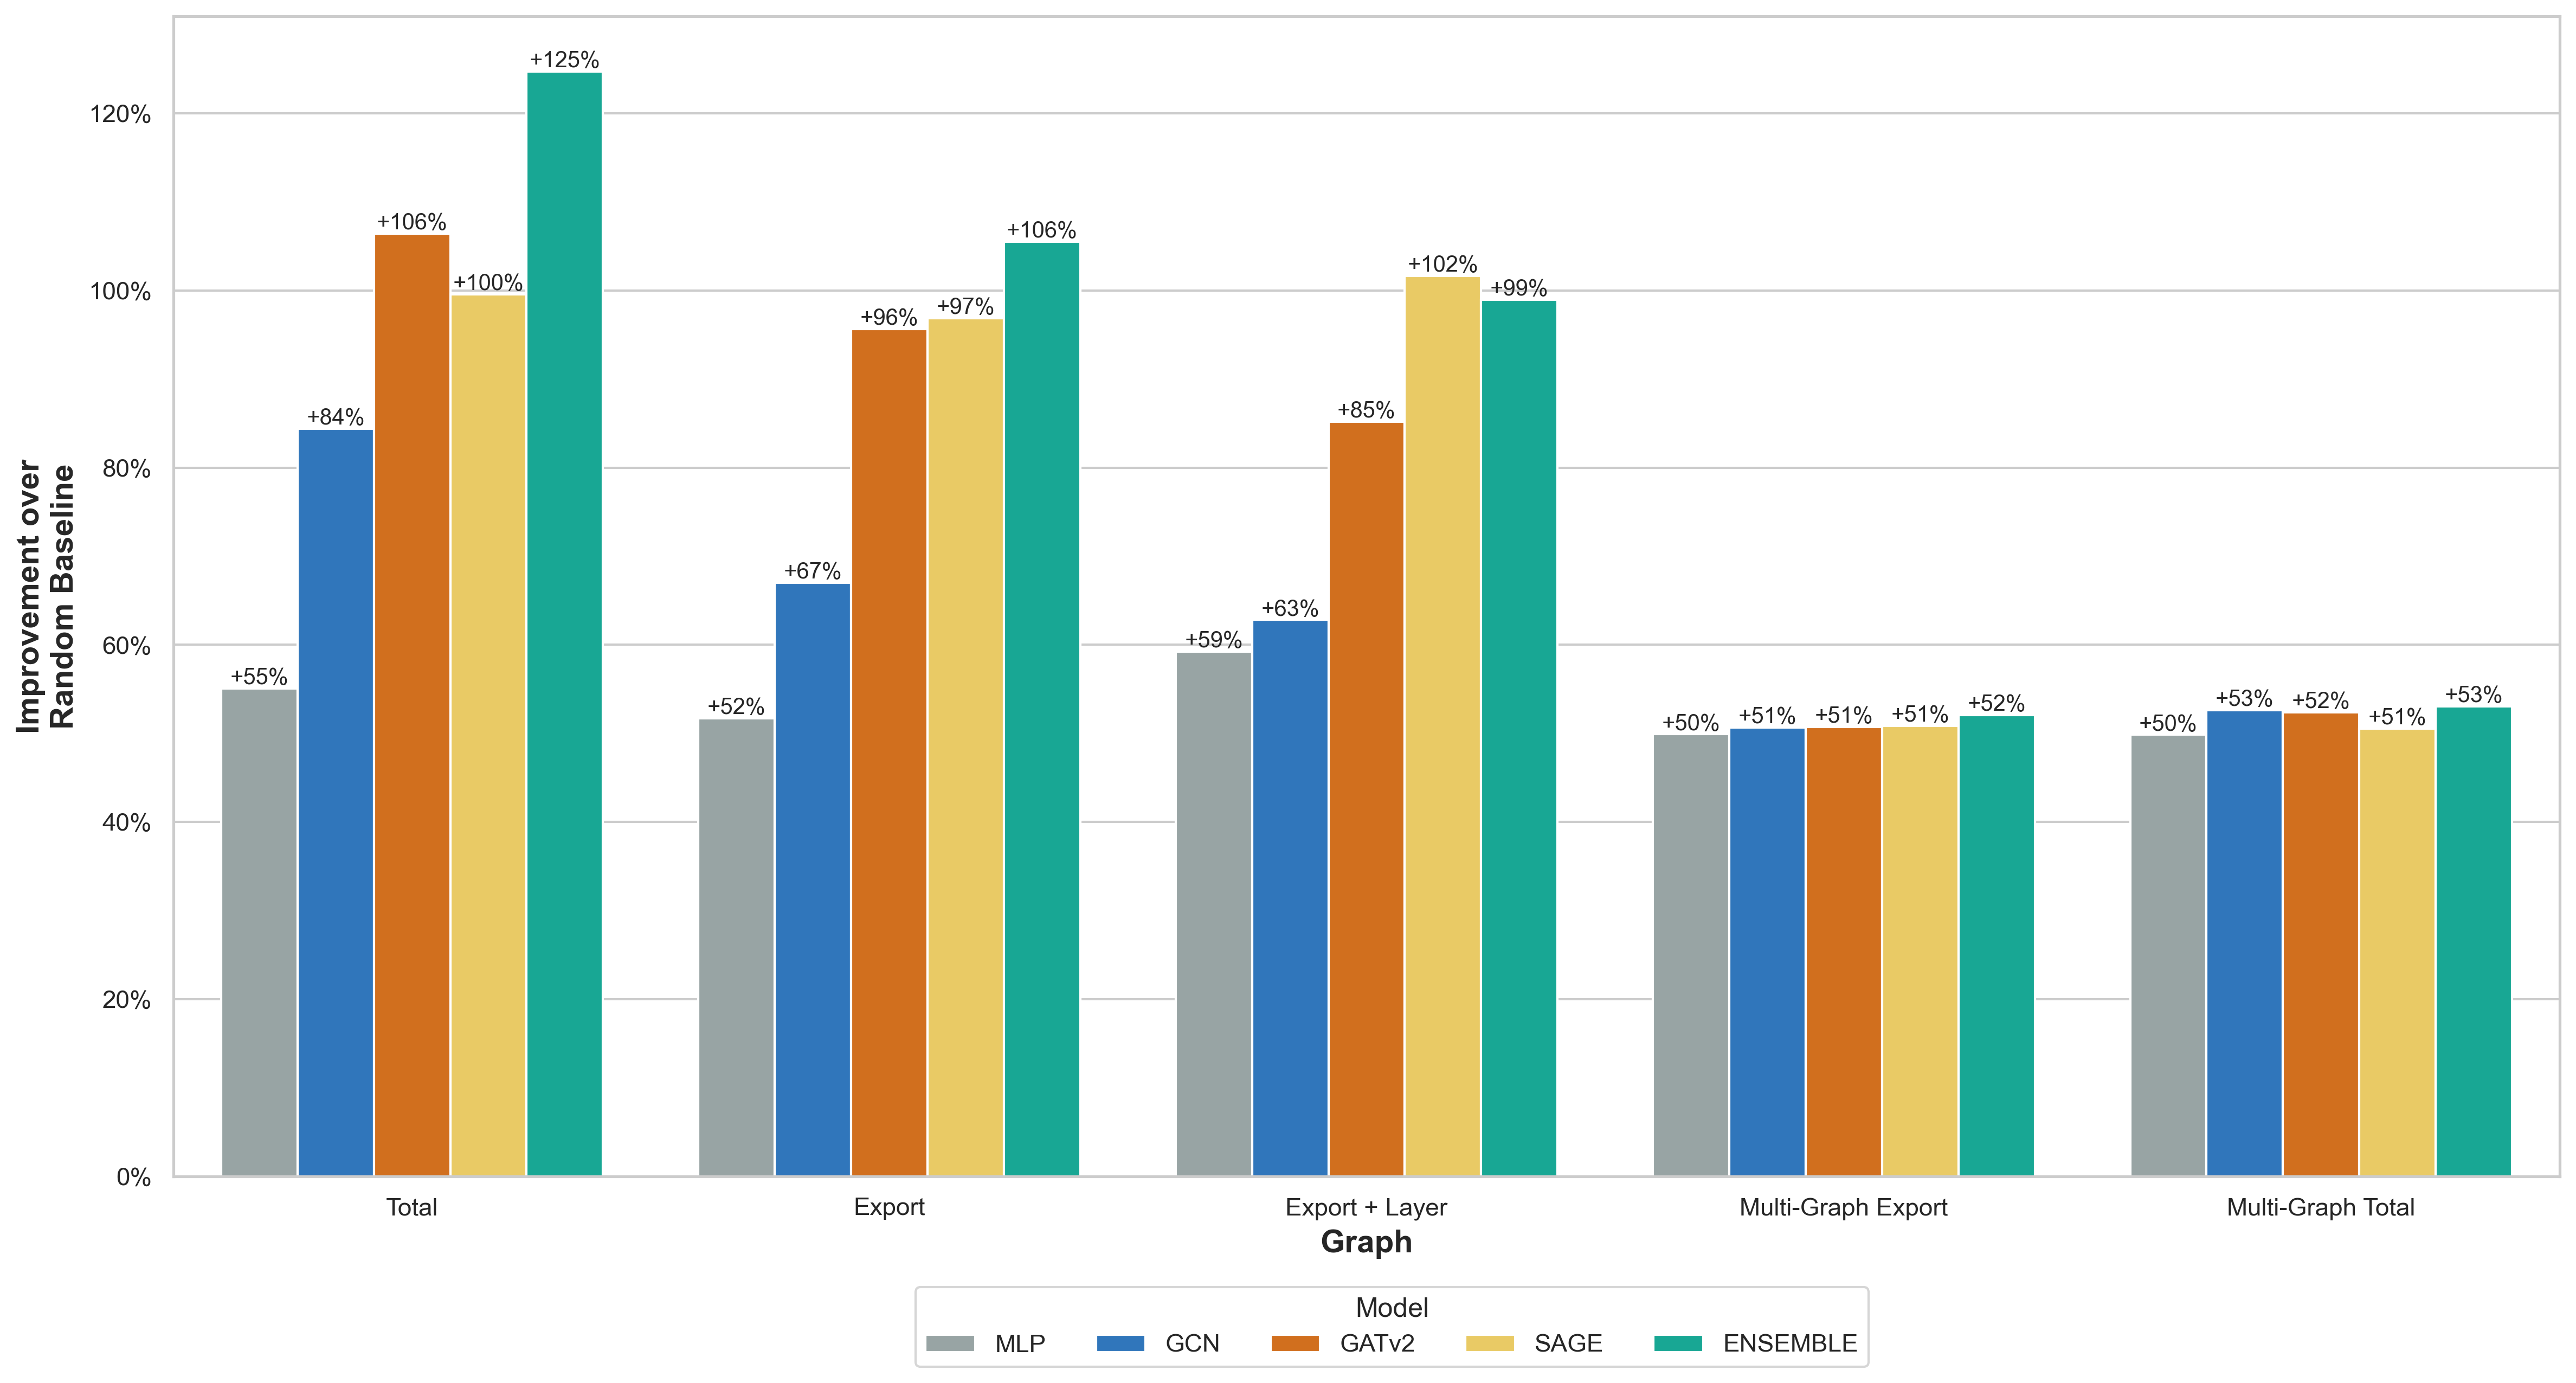

In [13]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(16, 8), dpi=300)

sns.barplot(y=over_baseline["Over Baseline"], x=over_baseline.Graph, hue=over_baseline.Model, palette=palette, ax=ax)

# Add labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height == 0:
        continue
    ax.text(
        x=p.get_x() + p.get_width() / 2,  # x-coordinate
        y=height,                         # y-coordinate (top of bar)
        s=f'+{height:.0%}',                # formatted label
        ha='center', va='bottom',         # center align horizontally, place label just above the bar
        fontsize=10
    )

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))  # Use 1.0 if your data is in [0, 1] range
ax.set_ylabel("Improvement over\nRandom Baseline", fontsize=14, fontweight="bold")
ax.set_xlabel("Graph", fontsize=14, fontweight="bold")

# Remove duplicate legends and create a single legend at the bottom
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()
plt.tight_layout()
fig.legend(handles, labels, title="Model", loc='lower center', ncol=5, bbox_to_anchor=(0.54, -0.07))
plt.savefig("results-improvement-over-baseline.pdf", bbox_inches="tight")
plt.show();

In [155]:
over_baseline[over_baseline.Graph == "Export + Layer"]

,Graph,Model,Over Baseline
12,Export + Layer,RND,NaN
13,Export + Layer,MLP,NaN
14,Export + Layer,GCN,NaN
15,Export + Layer,GATv2,NaN
16,Export + Layer,SAGE,NaN
17,Export + Layer,ENSAMBLE,NaN


In [18]:
results["0"]

{'precision': 0.8048780487804879,
 'recall': 0.6470588235294118,
 'f1-score': 0.717391304347826,
 'support': 51.0}